<img width="100%" align="center" src="https://www.kindpng.com/picc/m/709-7094657_thumb-image-universiti-malaya-logo-png-transparent-png.png">
<h1 align="center">WID3003 NEURAL COMPUTING</h1>
<h3 align="center" border="3px">02 PerceptronAssignment SGD and BGDMiniBGD</h3>
<table align="center">
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <td>Fadjar Soengkono</td>
    <td>S2000808</td>
  </tr>
</table>


In [1]:
import numpy as np
import scipy, pylab
import matplotlib.pyplot as plt
import random

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):#0.000001

    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []#loss
    weights = []
    previous_cost = None

    # Estimation of optimal parameters
    for i in range(iterations):

        # Making predictions
        y_predicted = (current_weight * x) + current_bias
        print(y_predicted)
        print(y)
        # Calculationg the current cost
        current_cost = sse(y, y_predicted)

        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        # Calculating the gradients
        #sum((outputs-predict)**2)
        # this is sse computed with the x and y predicted
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)

        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)

        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")


    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias

3.8
0.5106578390384587


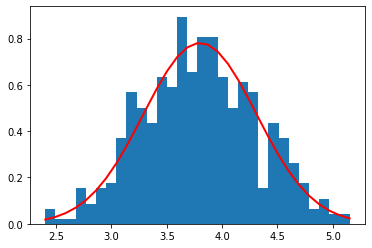

In [2]:
yes_calc = np.array([[4.72,1.72], [4.10,5.30], [4.10,5.30],[3.48,5.4],[3.59,4.32],[3.02,2.21],[3.59,4.32]])

mu_yes_a = np.mean(yes_calc[:,0])
sigma_yes_a = np.std(yes_calc[:,0])
print(mu_yes_a)
print(sigma_yes_a)
mu_yes_b = np.std(yes_calc[:,1])
sigma_yes_b = np.mean(yes_calc[:,1])
jumlah_data = 500
yes_normal_distribution_a = np.abs(np.random.normal(loc=mu_yes_a, scale=sigma_yes_a, size = jumlah_data))
yes_normal_distribution_b = np.abs(np.random.normal(loc=mu_yes_b, scale=sigma_yes_b, size = jumlah_data))


count, bins, ignored = plt.hist(yes_normal_distribution_a, 30, density=True)

plt.plot(bins, 1/(sigma_yes_a * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu_yes_a)**2 / (2 * sigma_yes_a**2) ),

         linewidth=2, color='r')

plt.show()

0.9291225699551162
1.105268632505238


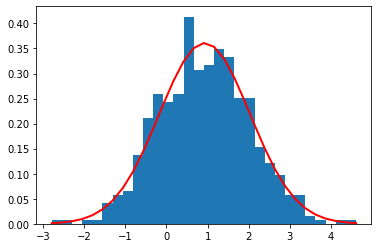

In [3]:
no_calc = np.array([[1.48,1.87], [0.33,4.68], [1.38,2.25],[2.94,2.37]])
mu_no_a = np.std(no_calc[:,0])
sigma_no_a =  np.std(no_calc[:,1])
mu_no_b =np.mean(no_calc[:,0])
sigma_no_b = np.mean(no_calc[:,1])
print(mu_no_a)
print(sigma_no_a)
no_normal_distribution_a = np.random.normal(loc=mu_no_a, scale=sigma_no_a, size =jumlah_data)
no_normal_distribution_b = np.random.normal(loc=mu_no_b, scale=sigma_no_b, size = jumlah_data)

count, bins, ignored = plt.hist(no_normal_distribution_a, 30, density=True)

plt.plot(bins, 1/(sigma_no_a * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu_no_a)**2 / (2 * sigma_no_a**2) ),

         linewidth=2, color='r')

plt.show()

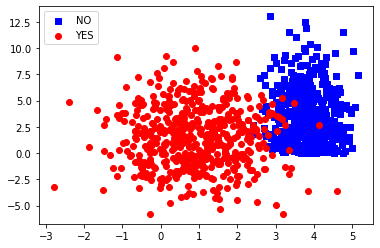

In [4]:

x1 = no_normal_distribution_a
y1= no_normal_distribution_b
x2 = yes_normal_distribution_a
y2 = yes_normal_distribution_b
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x2, y2, c='b', marker="s", label='NO')
ax1.scatter(x1, y1, c='r', marker="o", label='YES')
plt.legend(loc='upper left')
plt.show()

In [5]:
x_no = np.column_stack((no_normal_distribution_a, no_normal_distribution_b))
x_yes = np.column_stack((yes_normal_distribution_a, yes_normal_distribution_b))
y_no = np.zeros([len(x_no),], dtype = int)
y_yes = np.ones([len(x_yes),], dtype = int)

all_dataset_no = np.column_stack((x_no, y_no))
all_dataset_yes = np.column_stack((x_yes, y_yes))
all_dataset = np.append(all_dataset_no, all_dataset_yes, 0)

In [6]:
len(all_dataset)
np.random.shuffle(all_dataset)
len(all_dataset)
train_ratio = int(len(all_dataset)*0.8)
#it is fix
feature_train, feature_test = all_dataset[:train_ratio,:2], all_dataset[train_ratio:,:2]
label_train, label_test = all_dataset[:train_ratio,2], all_dataset[train_ratio:,2]

In [24]:
# X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
#            55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
#            45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
#            48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
# Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
#         78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
#         55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
#         60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

# all_dataset_XY = np.column_stack((X, Y))
# all_dataset_XY
# np.random.shuffle(all_dataset_XY)
# all_dataset_XY
# X_shuffled, Y_shuffled = all_dataset_XY[:,0], all_dataset_XY[:,1]
# print(X_shuffled)
# print(Y_shuffled)

In [7]:
def sigmoid_function(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))


def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)
def sse(outputs,predict):
  try:
    total = sum(outputs-predict)**2
    return total
  except:
    return (outputs-predict)**2

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()
def get_y_line(x1,w1,w2,bias):
    # 0 = w1x1 + w2x2 + bias
    # x2 = -(bias + w1x1)/w2
    return -(bias + w1*x1)/w2

def plots(iteration_counter, costs, accuracy,weight_1, weight_2):
  plt.figure(figsize = (8,6))
  plt.plot(iteration_counter, costs)
  #plt.scatter(iteration_counter, costs, marker='o', color='red')
  plt.title("Cost vs Iteration")
  plt.ylabel("cost")
  plt.xlabel("iteration")
  plt.show()

  plt.figure(figsize = (8,6))
  plt.plot(iteration_counter, accuracy)
  #plt.scatter(iteration_counter, accuracy, color='blue')
  plt.title("Acc vs Iteration")
  plt.ylabel("Acc")
  plt.xlabel("iteration")
  plt.show()

  plt.figure(figsize = (8,6))
  plt.plot(iteration_counter, weight_1)
  plt.plot(iteration_counter, weight_2)
  #plt.scatter(iteration_counter, weights_1, marker='o', color='red')
  plt.title("Cost vs Weights")
  plt.ylabel("Weight")
  plt.xlabel("Iteration")
  plt.show()

Iteration 1: Cost 1890.958272682685, Weight 1 1.7412987532764324 Weight 2 0.014841446706526054,  Bias 1.0461138189670425
Iteration 2: Cost 1659.1914993620417, Weight 1 1.7402574838471212 Weight 2 0.01337313222608145,  Bias 1.045095489606226
Iteration 3: Cost 2456.2887434428653, Weight 1 1.7388863041911427 Weight 2 0.01156487266404196,  Bias 1.0438564656094236
Iteration 4: Cost 1940.049063403714, Weight 1 1.7376158293924575 Weight 2 0.010467286213949104,  Bias 1.0427553159081444
Iteration 5: Cost 1968.7321528243413, Weight 1 1.7363304236591464 Weight 2 0.008953687591212262,  Bias 1.0416460559766967
Iteration 6: Cost 1889.5441949118012, Weight 1 1.7350412283318752 Weight 2 0.007296458377747274,  Bias 1.040559333785049
Iteration 7: Cost 1721.369279473297, Weight 1 1.7337972727714739 Weight 2 0.005712945679588956,  Bias 1.0395220990962388
Iteration 8: Cost 1762.3965007350223, Weight 1 1.7325314172569741 Weight 2 0.004325479720384721,  Bias 1.0384725764366647
Iteration 9: Cost 1676.80014717

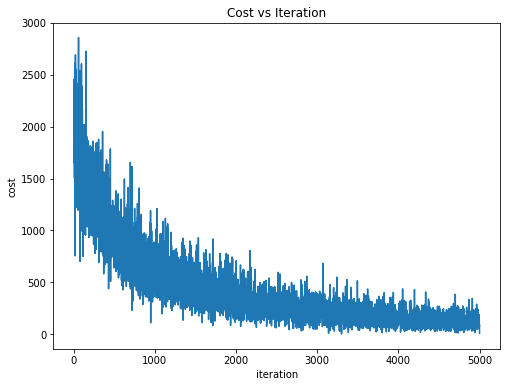

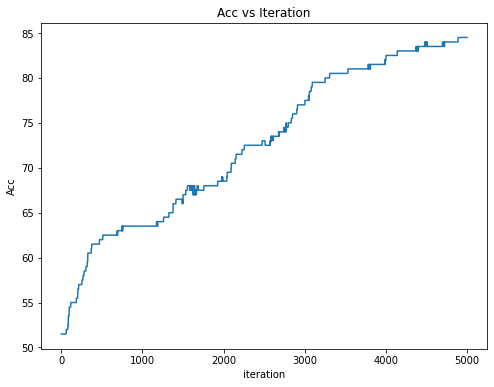

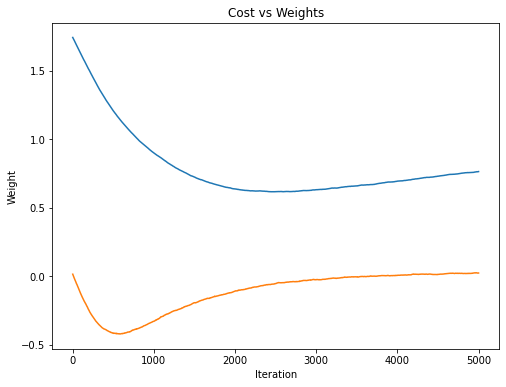

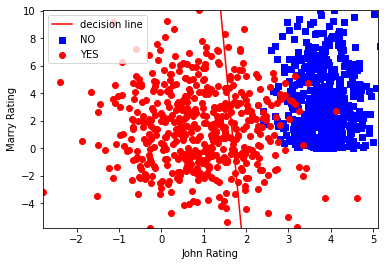

Iteration 1: Cost 64112.92699868641, Weight 1 -0.5844126438808168 Weight 2 -2.4772890353446284,  Bias 1.2124634939567762
Iteration 2: Cost 63072.157555679514, Weight 1 -0.5504903879264005 Weight 2 -2.4358981718805914,  Bias 1.218742036659689
Iteration 3: Cost 61961.29578540311, Weight 1 -0.5167240186592614 Weight 2 -2.394535237795074,  Bias 1.2249650431570243
Iteration 4: Cost 60777.598610433975, Weight 1 -0.483127879270137 Weight 2 -2.3532036927963067,  Bias 1.23112832143498
Iteration 5: Cost 59518.98467338963, Weight 1 -0.4497171275901171 Weight 2 -2.3119073899505382,  Bias 1.2372274496858753
Iteration 6: Cost 58184.14818392502, Weight 1 -0.41650765231006426 Weight 2 -2.27065061657786,  Bias 1.243257797322202
Iteration 7: Cost 56772.64472385123, Weight 1 -0.38351597315432123 Weight 2 -2.2294381389035736,  Bias 1.2492145500409582
Iteration 8: Cost 55284.938633527876, Weight 1 -0.3507591310373603 Weight 2 -2.188275251003109,  Bias 1.2550927374015273
Iteration 9: Cost 53722.404402145956

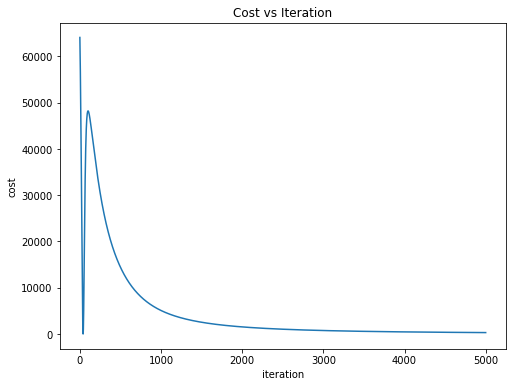

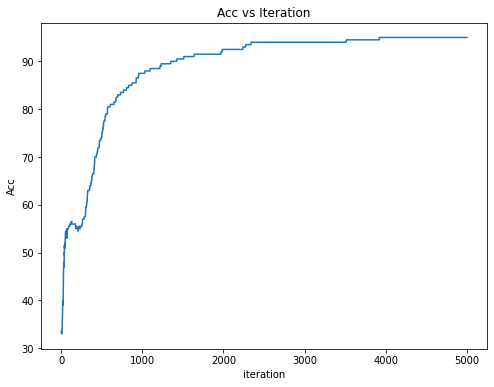

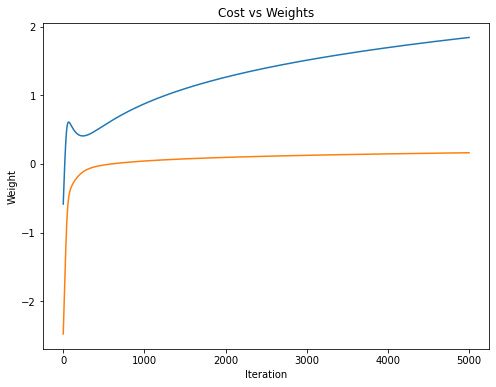

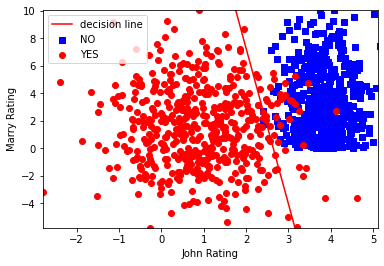

Iteration 1: Cost 83061.42692200329, Weight 1 -1.0204870769630066 Weight 2 -1.147493726614961,  Bias 0.45240788702368745
Iteration 2: Cost 82149.17284466523, Weight 1 -0.9844372034585469 Weight 2 -1.1073020022815379,  Bias 0.4595733062736627
Iteration 3: Cost 81157.6432874386, Weight 1 -0.9484560912110719 Weight 2 -1.0671826207223913,  Bias 0.46669535141917035
Iteration 4: Cost 80077.36391201153, Weight 1 -0.9125525002952428 Weight 2 -1.0271449764825842,  Bias 0.4737698374390171
Iteration 5: Cost 78897.64470597237, Weight 1 -0.8767366547657213 Weight 2 -0.9871999169943165,  Bias 0.4807920185774692
Iteration 6: Cost 77606.46115803729, Weight 1 -0.8410205063591152 Weight 2 -0.9473600060089795,  Bias 0.48775650263759696
Iteration 7: Cost 76190.34603764358, Weight 1 -0.805418044487042 Weight 2 -0.9076398399134794,  Bias 0.49465715233697505
Iteration 8: Cost 74634.30512040577, Weight 1 -0.7699456592028897 Weight 2 -0.8680564276198631,  Bias 0.5014869722980175
Iteration 9: Cost 72921.7764693

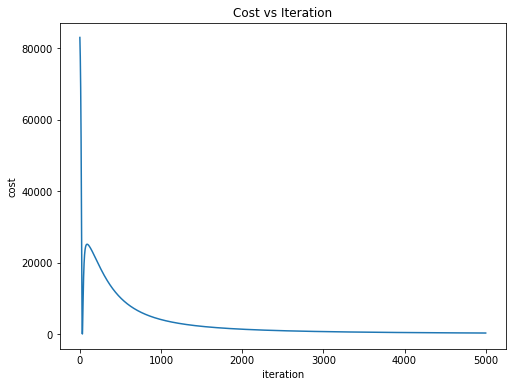

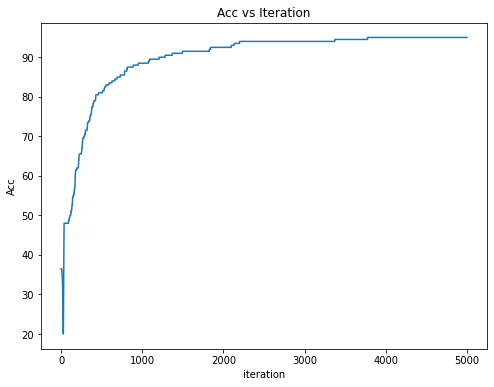

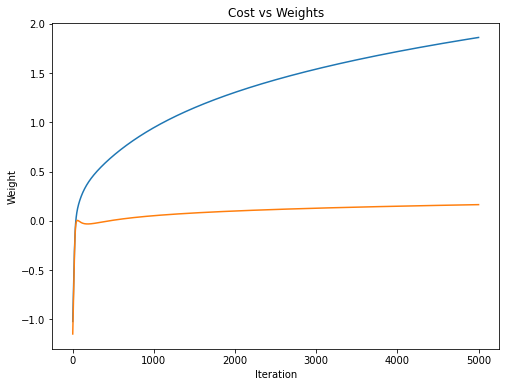

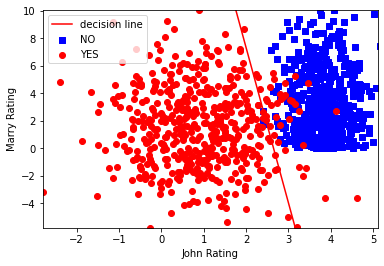

In [10]:
#do gradient descent with the 
class OurNeuralNetwork:
    def __init__(self):
    # Weights
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.bias = np.random.normal()
    def feedforward(self, X):
        # x is a numpy array with 2 elements.
        #print(X)
        xw =  self.w1*X[:,0] + self.w2*X[:,1] + self.bias
        #print(x1w1)
        #print(x2w2)
        # print(x1w1+x2w2)
        y_predicted_sigmoid = sigmoid_function(xw)
        return y_predicted_sigmoid

    def plot_line(self, all_dataset):
        x1x2 = all_dataset[:,:2]
        line_x = np.arange(x1x2[:,0].min(),x1x2[:,0].max(),0.1)
        x1 = no_normal_distribution_a
        y1= no_normal_distribution_b
        x2 = yes_normal_distribution_a
        y2 = yes_normal_distribution_b
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.set_xlim([line_x.min(), line_x.max()])
        ax1.set_ylim([y1.min(), y1.max()])
        #x = np.linspace(-5,5,100)
        plt.plot(line_x, get_y_line(line_x,self.w1,self.w2,self.bias), '-r', label='decision line')
        ax1.scatter(x2, y2, c='b', marker="s", label='NO')
        ax1.scatter(x1, y1, c='r', marker="o", label='YES')

        plt.xlabel('John Rating')
        plt.ylabel('Marry Rating')
        plt.legend(loc='upper left')
        plt.show()


    


    def train_minibatch(self, x_train, y_train, x_test,y_test):
        learn_rate = 0.001
        tolerance = 0.01
        epochs = 5000 # number of times to loop through the entire dataset
        cost = []
        iteration = []
        accuracy = []
        weight_1 = []
        weight_2 = []

        #take = all_dataset[:50]
        iterations = 5000
        learning_rate = 0.01
                   
        costs = []#loss
        iteration_counter = []
        previous_cost = None
        
        all_iteration_counter =0
        n = float(len(X)) 
        for j in range(epochs): #same like number of
            for start in range(0, x_train.shape[0], 16):
                stop = start + 16
                x_batch, y_batch = x_train[start:stop], y_train[start:stop]
                X, Y = x_batch, y_batch
                all_iteration_counter+=1
                # Making predictions
                #x1w1 =  (current_weight[0] * X[:,0]) + current_bias[0]
                #x2w2 = (current_weight[1] * X[:,1]) + current_bias[1]
                xw =  self.w1*X[:,0] + self.w2*X[:,1] + self.bias
                #print(x1w1)
                #print(x2w2)
                # print(x1w1+x2w2)
                y_predicted_sigmoid = sigmoid_function(xw)
                #cob = np.log(y_predicted_sigmoid/ (1 -y_predicted_sigmoid))
                #y_predicted_sigmoid[y_predicted_sigmoid < 0.5] = 0
                #y_predicted_sigmoid[y_predicted_sigmoid > 0.5] = 1

                y_predicted = y_predicted_sigmoid
                #print(y_predicted)
                #print(Y)
                # Calculationg the current cost
                #print(y_predicted_sigmoid)
                #print(Y)
                current_cost = sse(Y, y_predicted)

                # If the change in cost is less than or equal to
                # stopping_threshold we stop the gradient descent
                if previous_cost and abs(previous_cost-current_cost)<=0.006:
                    break
                    
                previous_cost = current_cost
                    
                # Calculating the gradients
                #sum((outputs-predict)**2)

                d_L_d_ypred = -2 * (Y - y_predicted)
                weight_derivative_0 = -(2/n) * sum(X[:,0] * (Y-y_predicted))
                weight_derivative_1 = -(2/n) * sum(X[:,1] * (Y-y_predicted))
                bias_derivative = -(2/n) * sum(Y-y_predicted)
                    
                # Updating weights and bias
                self.w1 = self.w1 - (learning_rate * weight_derivative_0)
                self.w2 = self.w2 - (learning_rate * weight_derivative_1)
                self.bias = self.bias - (learning_rate * bias_derivative)
                
                #appending for the plot
                costs.append(current_cost)
                iteration_counter.append(all_iteration_counter)
                weight_1.append(self.w1)
                weight_2.append(self.w2)
                            
                # Printing the parameters for each 1000th iteration
                N = len(y_test)
                y_test_preds = self.feedforward(x_test)
                y_test_preds[y_test_preds > 0.5] = 1
                y_test_preds[y_test_preds < 0.5] = 0
                accuracy_calculation = (y_test ==y_test_preds).sum() / N *100
                # print(accuracy_calculation)
                # TP = ((y_preds == 1) & (y_sample == 1)).sum()
                # FP = ((y_preds == 1) & (y_sample == 0)).sum()
                # precision = TP / (TP+FP)
                accuracy.append(accuracy_calculation)

                
                print(f"Iteration {j+1}: Cost {current_cost}, Weight 1 {self.w1} Weight 2 {self.w2},  Bias {self.bias}")
        
        plots(iteration_counter, costs, accuracy,weight_1, weight_2)


    def train_sgd(self, x_train, y_train, x_test,y_test):
        tolerance = 0.01
        epochs = 5000 # number of times to loop through the entire dataset
        cost = []
        iteration = []
        accuracy = []
        weight_1 = []
        weight_2 = []

        #take = all_dataset[:50]
        X, Y = x_train, y_train
        iterations = 5000
        learning_rate = 0.01            
        costs = []#loss
        iteration_counter = []
        previous_cost = None
        n = float(len(X))
        all_iteration_counter =0
          
        all_dataset_whole = np.column_stack((x_train, y_train))
        for j in range(epochs):
            #for i in range(len(y_train)):
                #all_dataset_XY = np.column_stack((X, Y))
                #np.random.shuffle(all_dataset)
                np.random.shuffle(all_dataset_whole)
                index = np.random.randint(0,len(y_train))
                all_dataset_sample = all_dataset_whole[0:100]

                X = all_dataset_sample[:,:2]
                Y = all_dataset_sample[:,-1]
                all_iteration_counter+=1       
                # Making predictions
                #x1w1 =  (current_weight[0] * X[:,0]) + current_bias[0]
                #x2w2 = (current_weight[1] * X[:,1]) + current_bias[1]
                xw =  self.w1*X[:,0] + self.w2*X[:,1] + self.bias
                #print(x1w1)
                #print(x2w2)
                # print(x1w1+x2w2)
                y_predicted_sigmoid = sigmoid_function(xw)
                #cob = np.log(y_predicted_sigmoid/ (1 -y_predicted_sigmoid))
                #y_predicted_sigmoid[y_predicted_sigmoid < 0.5] = 0
                #y_predicted_sigmoid[y_predicted_sigmoid > 0.5] = 1

                y_predicted = y_predicted_sigmoid
                #print(y_predicted)
                #print(Y)
                # Calculationg the current cost
                #print(y_predicted_sigmoid)
                #print(Y)
                current_cost = sse(Y, y_predicted)

                # If the change in cost is less than or equal to
                # stopping_threshold we stop the gradient descent
                if previous_cost and abs(previous_cost-current_cost)<=0.006:
                    break
                    
                previous_cost = current_cost
                    
                # Calculating the gradients
                #sum((outputs-predict)**2)

                d_L_d_ypred = -2 * (Y - y_predicted)
                weight_derivative_0 = -(2/n) * sum(X[:,0] * (Y-y_predicted))
                weight_derivative_1 = -(2/n) * sum(X[:,1] * (Y-y_predicted))
                bias_derivative = -(2/n) * sum(Y-y_predicted)
                    
                # Updating weights and bias
                self.w1 = self.w1 - (learning_rate * weight_derivative_0)
                self.w2 = self.w2 - (learning_rate * weight_derivative_1)
                self.bias = self.bias - (learning_rate * bias_derivative)
                
                #appending for the plot
                costs.append(current_cost)
                iteration_counter.append(all_iteration_counter)
                weight_1.append(self.w1)
                weight_2.append(self.w2)
                            
                # Printing the parameters for each 1000th iteration
                N = len(y_test)
                y_test_preds = self.feedforward(x_test)
                y_test_preds[y_test_preds > 0.5] = 1
                y_test_preds[y_test_preds < 0.5] = 0
                accuracy_calculation = (y_test ==y_test_preds).sum() / N *100
                # print(accuracy_calculation)
                # TP = ((y_preds == 1) & (y_sample == 1)).sum()
                # FP = ((y_preds == 1) & (y_sample == 0)).sum()
                # precision = TP / (TP+FP)
                accuracy.append(accuracy_calculation)

                
                print(f"Iteration {j+1}: Cost {current_cost}, Weight 1 {self.w1} Weight 2 {self.w2},  Bias {self.bias}")
        
        plots(iteration_counter, costs, accuracy,weight_1, weight_2)
    
    

    def train_bgd(self, x_train, y_train, x_test,y_test):
        learn_rate = 0.001
        tolerance = 0.01
        epochs = 5000 # number of times to loop through the entire dataset
        cost = []
        iteration = []
        accuracy = []
        weight_1 = []
        weight_2 = []

        #take = all_dataset[:50]
        iterations = 5000
        learning_rate = 0.01
                   
        costs = []#loss
        iteration_counter = []
        previous_cost = None
        X, Y = x_train, y_train
        all_iteration_counter =0
        n = float(len(X)) 
        for j in range(epochs):
            #all_dataset_XY = np.column_stack((X, Y))
            #np.random.shuffle(all_dataset)

            
            all_iteration_counter+=1       
            # Making predictions
            #x1w1 =  (current_weight[0] * X[:,0]) + current_bias[0]
            #x2w2 = (current_weight[1] * X[:,1]) + current_bias[1]
            xw =  self.w1*X[:,0] + self.w2*X[:,1] + self.bias
            #print(x1w1)
            #print(x2w2)
            # print(x1w1+x2w2)
            y_predicted_sigmoid = sigmoid_function(xw)
            #cob = np.log(y_predicted_sigmoid/ (1 -y_predicted_sigmoid))
            #y_predicted_sigmoid[y_predicted_sigmoid < 0.5] = 0
            #y_predicted_sigmoid[y_predicted_sigmoid > 0.5] = 1

            y_predicted = y_predicted_sigmoid
            #print(y_predicted)
            #print(Y)
            # Calculationg the current cost
            #print(y_predicted_sigmoid)
            #print(Y)
            current_cost = sse(Y, y_predicted)

            # If the change in cost is less than or equal to
            # stopping_threshold we stop the gradient descent
            if previous_cost and abs(previous_cost-current_cost)<=0.006:
                break
                
            previous_cost = current_cost
                
            # Calculating the gradients
            #sum((outputs-predict)**2)

            d_L_d_ypred = -2 * (Y - y_predicted)
            weight_derivative_0 = -(2/n) * sum(X[:,0] * (Y-y_predicted))
            weight_derivative_1 = -(2/n) * sum(X[:,1] * (Y-y_predicted))
            bias_derivative = -(2/n) * sum(Y-y_predicted)
                
            # Updating weights and bias
            self.w1 = self.w1 - (learning_rate * weight_derivative_0)
            self.w2 = self.w2 - (learning_rate * weight_derivative_1)
            self.bias = self.bias - (learning_rate * bias_derivative)
            
            #appending for the plot
            costs.append(current_cost)
            iteration_counter.append(all_iteration_counter)
            weight_1.append(self.w1)
            weight_2.append(self.w2)
                        
            # Printing the parameters for each 1000th iteration
            N = len(y_test)
            y_test_preds = self.feedforward(x_test)
            y_test_preds[y_test_preds > 0.5] = 1
            y_test_preds[y_test_preds < 0.5] = 0
            accuracy_calculation = (y_test ==y_test_preds).sum() / N *100
            # print(accuracy_calculation)
            # TP = ((y_preds == 1) & (y_sample == 1)).sum()
            # FP = ((y_preds == 1) & (y_sample == 0)).sum()
            # precision = TP / (TP+FP)
            accuracy.append(accuracy_calculation)

            
            print(f"Iteration {j+1}: Cost {current_cost}, Weight 1 {self.w1} Weight 2 {self.w2},  Bias {self.bias}")
        
        plots(iteration_counter, costs, accuracy,weight_1, weight_2)

np.random.shuffle(all_dataset)
#take = all_dataset[:50]
#data, all_y_trues = all_dataset[:,:2], all_dataset[:,-1]
train_ratio = int(len(all_dataset)*0.8)
x_train, x_test = all_dataset[:train_ratio,:2], all_dataset[train_ratio:,:2]
y_train, y_test = all_dataset[:train_ratio,2], all_dataset[train_ratio:,2]
#print(x_test)

# Train our neural network!
sgd = OurNeuralNetwork()
#network.train_minibatch(data, all_y_trues)
sgd.train_sgd(x_train, y_train,x_test, y_test)
sgd.plot_line(all_dataset)

bgd = OurNeuralNetwork()
#network.train_minibatch(x_train, y_train,x_test, y_test)
bgd.train_bgd(x_train, y_train,x_test, y_test)
bgd.plot_line(all_dataset)


minibatch = OurNeuralNetwork()
#network.train_minibatch(x_train, y_train,x_test, y_test)
minibatch.train_bgd(x_train, y_train,x_test, y_test)
minibatch.plot_line(all_dataset)

     

In [134]:
#calculate accuracy SGD
def calculate(x,y,network):
    y_preds = network.feedforward(x)
    y_preds[y_preds >= 0.5] = 1
    y_preds[y_preds < 0.5] = 0
    accuracy = (y ==y_preds).sum() / len(y) *100
    return accuracy
#SGD
accuracy_no = calculate(all_dataset_no[:,:2],all_dataset_no[:,-1],sgd)
accuracy_yes = calculate(all_dataset_yes[:,:2],all_dataset_yes[:,-1],sgd)
print("===== SGD =====")
print(accuracy_no)
print(accuracy_yes)
#BGD
accuracy_no = calculate(all_dataset_no[:,:2],all_dataset_no[:,-1],bgd)
accuracy_yes = calculate(all_dataset_yes[:,:2],all_dataset_yes[:,-1],bgd)
print("===== BGD ====")
print(accuracy_no)
print(accuracy_yes)

#MINIBATCH
accuracy_no = calculate(all_dataset_no[:,:2],all_dataset_no[:,-1],minibatch)
accuracy_yes = calculate(all_dataset_yes[:,:2],all_dataset_yes[:,-1],minibatch)
print("==== MINIBATCH ====")
print(accuracy_no)
print(accuracy_yes)

#all_dataset[:,-1]


===== SGD =====
82.19999999999999
100.0
===== BGD ====
92.2
99.2
==== MINIBATCH ====
91.8
99.2


In [139]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 10000, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2019)
def stocashtic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            print(X_i)
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)
        cost_history[it] = cost
    return theta, cost_history


def cal_cost(theta,X,y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost




lr = 0.05
n_iter = 1000
theta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)
print("Theta0: {:0.3f},\nTheta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE:  {:0.3f}".format(cost_history[-1]))



Theta0: 0.332,
Theta1:10.638
Final cost/MSE:  1986602.974


In [142]:
X_b

array([[ 1.        ,  0.03889043],
       [ 1.        ,  0.84877376],
       [ 1.        ,  0.20219035],
       ...,
       [ 1.        , -0.57136557],
       [ 1.        , -0.29240938],
       [ 1.        ,  1.72115767]])

3.8299999999999996
0.5406578390384588


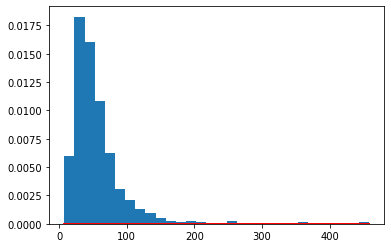

0.9591225699551162
1.1352686325052381


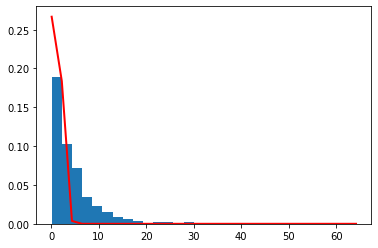

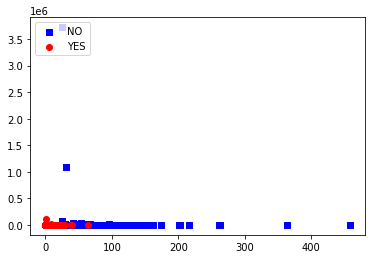

In [97]:
#PART 2 
# Using BGD
#create new random log normal distribution using custom standard deviation and mean
# beware the same name variable used 
yes_calc = np.array([[4.72,1.72], [4.10,5.30], [4.10,5.30],[3.48,5.4],[3.59,4.32],[3.02,2.21],[3.59,4.32]])

mu_yes_a = np.mean(yes_calc[:,0])+0.03
sigma_yes_a = np.std(yes_calc[:,0])+0.03
print(mu_yes_a)
print(sigma_yes_a)
mu_yes_b = np.std(yes_calc[:,1])+0.05
sigma_yes_b = np.mean(yes_calc[:,1])+0.05
jumlah_data = 500
yes_normal_distribution_a = np.abs(np.random.lognormal(mu_yes_a,sigma_yes_a,jumlah_data))
yes_normal_distribution_b = np.abs(np.random.lognormal(mu_yes_b,sigma_yes_b, jumlah_data))


count, bins, ignored = plt.hist(yes_normal_distribution_a, 30, density=True)

plt.plot(bins, 1/(sigma_yes_a * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu_yes_a)**2 / (2 * sigma_yes_a**2) ),

         linewidth=2, color='r')

plt.show()



no_calc = np.array([[1.48,1.87], [0.33,4.68], [1.38,2.25],[2.94,2.37]])
mu_no_a = np.std(no_calc[:,0])+0.03
sigma_no_a =  np.std(no_calc[:,1])+0.03
mu_no_b =np.mean(no_calc[:,0])+0.03
sigma_no_b = np.mean(no_calc[:,1])+0.03
print(mu_no_a)
print(sigma_no_a)
no_normal_distribution_a = np.random.lognormal(mu_no_a,sigma_no_a,jumlah_data)
no_normal_distribution_b = np.random.lognormal(mu_no_b,sigma_no_b,jumlah_data)

count, bins, ignored = plt.hist(no_normal_distribution_a, 30, density=True)

plt.plot(bins, 1/(sigma_no_a * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu_no_a)**2 / (2 * sigma_no_a**2) ),

         linewidth=2, color='r')

plt.show()

x1 = no_normal_distribution_a
y1= no_normal_distribution_b
x2 = yes_normal_distribution_a
y2 = yes_normal_distribution_b
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x2, y2, c='b', marker="s", label='NO')
ax1.scatter(x1, y1, c='r', marker="o", label='YES')
plt.legend(loc='upper left')
plt.show()


x_no = np.column_stack((no_normal_distribution_a, no_normal_distribution_b))
x_yes = np.column_stack((yes_normal_distribution_a, yes_normal_distribution_b))
y_no = np.zeros([len(x_no),], dtype = int)
y_yes = np.ones([len(x_yes),], dtype = int)

all_dataset_no = np.column_stack((x_no, y_no))
all_dataset_yes = np.column_stack((x_yes, y_yes))
all_dataset_imbalance = np.append(all_dataset_no, all_dataset_yes, 0)

C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_8068\664664503.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration 1: Cost 403.36377368519214, Weight 1 0.1599716064963529 Weight 2 27.077077769940377,  Bias 0.3029588901747799
Iteration 2: Cost 400.1691190509573, Weight 1 0.12120181839963887 Weight 2 23.977528114608738,  Bias 0.29487550470983864
Iteration 3: Cost 398.43508421629184, Weight 1 0.08272542338979028 Weight 2 20.877979685528352,  Bias 0.28682143667820625
Iteration 4: Cost 396.28582418542095, Weight 1 0.045065781477909746 Weight 2 17.778433377563225,  Bias 0.2788185700035099
Iteration 5: Cost 393.9428585547259, Weight 1 0.010359860123613993 Weight 2 14.678891628205077,  Bias 0.2709292034498316
Iteration 6: Cost 394.29990819888405, Weight 1 -0.010694737658525577 Weight 2 11.57936314201401,  Bias 0.26335630354581463
Iteration 7: Cost 405.4020612618563, Weight 1 0.006466421926498371 Weight 2 8.479869446228875,  Bias 0.2563122311826416
Iteration 8: Cost 388.97258048141055, Weight 1 -0.0056708360835374585 Weight 2 5.380371518278251,  Bias 0.24899921320734714
Iteration 9: Cost 391.88043

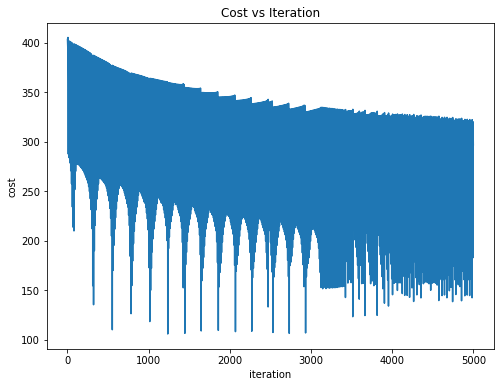

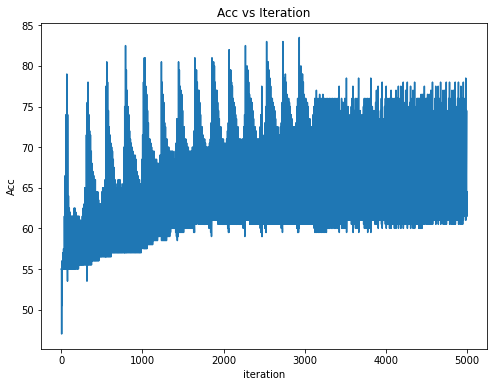

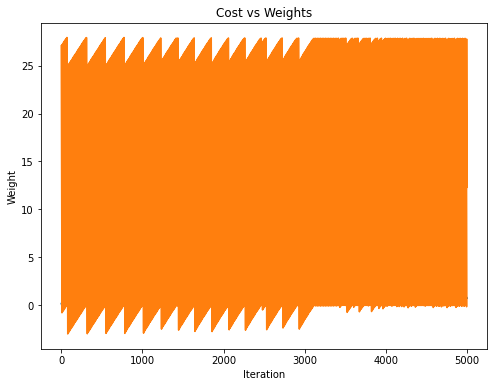

Iteration 1: Cost 40.74593216984329, Weight 1 0.8972090936070246 Weight 2 0.5409165543435468,  Bias -1.3515704706389522
Iteration 2: Cost 49.93897926704569, Weight 1 0.8914347739574454 Weight 2 0.5076439882915297,  Bias -1.3526382177602754
Iteration 3: Cost 40.17060548443046, Weight 1 0.8862475274747339 Weight 2 -1.7696969860600817,  Bias -1.353495678544813
Iteration 4: Cost 27.275029298789814, Weight 1 0.9003686950287645 Weight 2 -1.6778891213169498,  Bias -1.353485532902615
Iteration 5: Cost 27.540097557542715, Weight 1 0.918493760938276 Weight 2 -1.4790289562970864,  Bias -1.3533962533375297
Iteration 6: Cost 29.801170918897338, Weight 1 0.9379753059285387 Weight 2 -0.10560638317192717,  Bias -1.3533804989142908
Iteration 7: Cost 27.81879404353632, Weight 1 0.9391369570488434 Weight 2 0.708637176386481,  Bias -1.3538122686383578
Iteration 8: Cost 43.17145877291146, Weight 1 0.9345510852856854 Weight 2 0.26894752731271604,  Bias -1.3547309567529757
Iteration 9: Cost 47.36925624770668

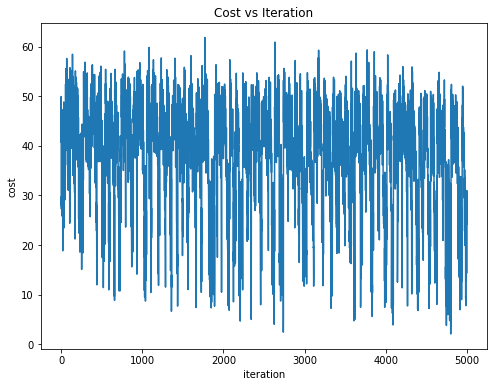

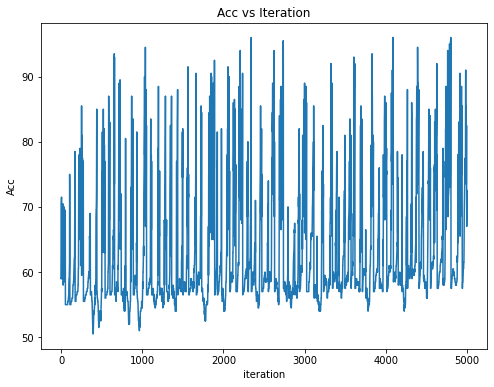

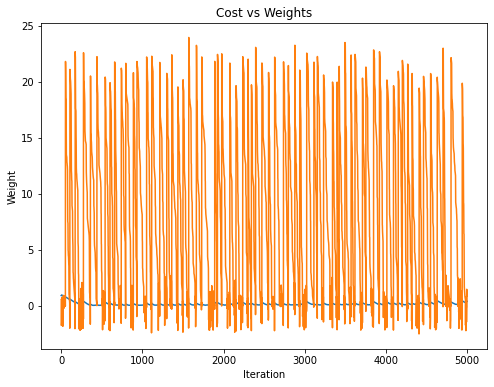

In [98]:
np.random.shuffle(all_dataset_imbalance)
#take = all_dataset[:50]
#data, all_y_trues = all_dataset[:,:2], all_dataset[:,-1]
train_ratio = int(len(all_dataset_imbalance)*0.8)
x_train, x_test = all_dataset_imbalance[:train_ratio,:2],all_dataset_imbalance[train_ratio:,:2]
y_train, y_test = all_dataset_imbalance[:train_ratio,2], all_dataset_imbalance[train_ratio:,2]


# Train our neural network!
bgd_imbalance = OurNeuralNetwork()
bgd_imbalance.train_bgd(x_train, y_train,x_test, y_test)

sgd_imbalance = OurNeuralNetwork()
sgd_imbalance.train_sgd(x_train, y_train,x_test, y_test)

minibatch_imbalance = OurNeuralNetwork()
minibatch_imbalance.train_minibatch(x_train, y_train,x_test, y_test)

### which converged faster?
faster sgd because only used subset of wholedata instead all of the data
more accurate gd but more expensive because run through all the whole dataset


### what happen to the weight as algorithm converges?
the weight is updated (if there is bias the bias updated too) when it is converges
mean the error is very low then the weight and/or bias is optimized

### what is the difference between SGD to BGD?
SGD use subset sample at a time then do gradient descent , the error will be fluctuate not smoother and it wont necesarily decrease the cost/lost, but in the long run it will be decreasing  with the fluctuations

BGD batch

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters.

So that’s just one step of gradient descent in one epoch.

Batch Gradient Descent is great for convex or relatively smooth error manifolds. In this case, we move somewhat directly towards an optimum solution.

Mini batch
we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw. So, after creating the mini-batches of fixed size, we do the following steps in one epoch:

Pick a mini-batch
Feed it to Neural Network
Calculate the mean gradient of the mini-batch
Use the mean gradient we calculated in step 3 to update the weights
Repeat steps 1–4 for the mini-batches we created